# Example Solution


New Catalyst Fraction = 0.01
Old Catalyst Fraction = 0.009900990099009875
Change = 1.0%

Pulse #: 0
Percent: [------------------->] 100.0%%Completed in: 84.377 seconds
no experimental data


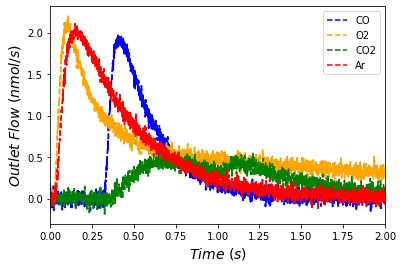

SystemExit: 

/home/ayonge3/anaconda3/envs/tapsolver-2024/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
from tapsolver import *

new_reactor = reactor()

# Define the gasses

# Define the gasses

species = reactor_species()

CO = define_gas()
CO.mass = 28
CO.intensity = 1
CO.delay = 0.3
CO.noise = 0.05
species.add_gas('CO',CO)

O2 = define_gas()
O2.mass = 32
O2.intensity = 2.5
O2.noise = 0.05
species.add_gas('O2',O2)

CO2 = define_gas()
CO2.mass = 44
CO2.intensity = 0.1
CO2.delay = 1
CO2.noise = 0.05
species.add_gas('CO2',CO2)

Ne = define_gas()
Ne.mass = 20
Ne.intensity = 1
Ne.noise = 0.05
species.add_inert_gas('Ne',Ne)

s = define_adspecies()
s.concentration = 0
species.add_adspecies('O2*',s)

s = define_adspecies()
s.concentration = 0
species.add_adspecies('O*',s)

s = define_adspecies()
s.concentration = 0
species.add_adspecies('CO2*',s)

s = define_adspecies()
s.concentration = 100
species.add_adspecies('*',s)

mech = mechanism()

mech = mechanism()

mech.elementary_processes[0] = elementary_process('O2 + * <-> O2*')
mech.elementary_processes[0].forward.k = 10
mech.elementary_processes[0].backward.k = 3

mech.elementary_processes[1] = elementary_process('CO + O2* <-> CO2* + O*')
mech.elementary_processes[1].forward.k = 20
mech.elementary_processes[1].backward.k = 0.3

mech.elementary_processes[2] = elementary_process('CO2* <-> CO2 + *')
mech.elementary_processes[2].forward.k = 10
mech.elementary_processes[2].backward.k = 1

for j in mech.elementary_processes:
	mech.elementary_processes[j].forward.use = 'k'
	try:
		mech.elementary_processes[j].backward.use = 'k'
	except:
		pass

mechanism_constructor(mech)

simulation = TAPobject()
simulation.reactor = new_reactor
simulation.reactor_species = species
simulation.mechanism = mech

simulation.output_name = 'co_problem'

forward_problem(2,1,simulation)
flux_graph(simulation)